<a href="https://colab.research.google.com/github/sultanardian/dqlab-data-science-course/blob/main/kecerdasan%20komputasional/Kecerdasan_Komputasional_B_Kel_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check version of the libraries
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn

print('python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))

python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


In [ ]:
# Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Load dataset
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Summarize dataset
print(df.shape, '\n')
print(df.describe, '\n')
print(df.groupby('Drug').size(), '\n')

(200, 6) 

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]> 

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64 



In [ ]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder

feats = df.drop('Drug', axis = 1)
cat_col_feats = feats.dtypes[feats.dtypes == 'object'].index

LE = LabelEncoder()

for col in cat_col_feats:
    df[col] = LE.fit_transform(df[col])

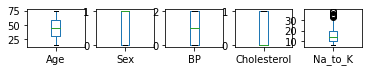

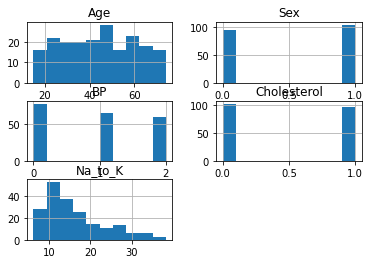

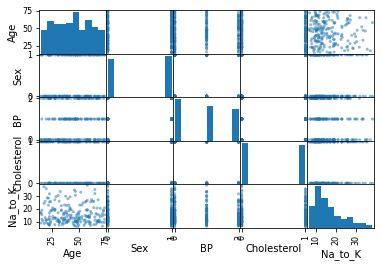

In [ ]:
# Visualize the dataset
# boxplot
df.plot(kind = 'box', subplots = True, layout = (5, 5), sharex = False, sharey = False)
plt.show()

# histogram
df.hist()
plt.show()

# scatterplot matrix
scatter_matrix(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR : mean 0.856, std (0.056)
LDA : mean 0.894, std (0.063)
KNN : mean 0.644, std (0.108)
CART : mean 1.000, std (0.000)
NB : mean 0.881, std (0.071)
SVM : mean 0.713, std (0.089)


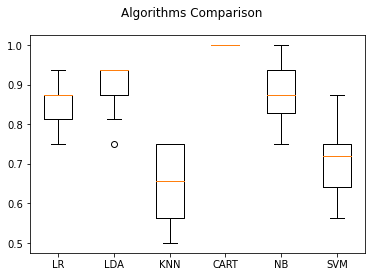

In [ ]:
# Evaluate algorithms

# Get train and test validation set
x = df.drop('Drug', axis = 1)
y = df['Drug']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 7)

# Test harness
seed = 7
scoring = 'accuracy'

# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
KFoldSplits = 10

for name, model in models:
    kfold = model_selection.KFold(n_splits = KFoldSplits, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print('{} : mean {}, std ({})'.format(name, format(cv_results.mean(), '.3f'), format(cv_results.std(), '.3f')))

# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
SVM = SVC()
SVM.fit(X_train, Y_train)
predict = SVM.predict(X_test)
acc_score = accuracy_score(Y_test, predict)

print('Accuracy of SVM model : {} \n'.format(acc_score))
print('Confusion matrix :\n {} \n'.format(confusion_matrix(Y_test, predict)))
print('Classification report :\n {} \n'.format(classification_report(Y_test, predict)))

Accuracy of SVM model : 0.625 

Confusion matrix :
 [[18  0  0  0  0]
 [ 0  0  0  0  4]
 [ 2  0  0  0  4]
 [ 0  0  0  0  4]
 [ 1  0  0  0  7]] 

Classification report :
               precision    recall  f1-score   support

       DrugY       0.86      1.00      0.92        18
       drugA       0.00      0.00      0.00         4
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         4
       drugX       0.37      0.88      0.52         8

    accuracy                           0.62        40
   macro avg       0.25      0.38      0.29        40
weighted avg       0.46      0.62      0.52        40
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predict = KNN.predict(X_test)
acc_score = accuracy_score(Y_test, predict)

print('Accuracy of KNN model : {} \n'.format(acc_score))
print('Confusion matrix :\n {} \n'.format(confusion_matrix(Y_test, predict)))
print('Classification report :\n {} \n'.format(classification_report(Y_test, predict)))

Accuracy of KNN model : 0.7 

Confusion matrix :
 [[17  0  0  0  1]
 [ 0  3  0  0  1]
 [ 0  0  4  0  2]
 [ 0  3  1  0  0]
 [ 1  1  2  0  4]] 

Classification report :
               precision    recall  f1-score   support

       DrugY       0.94      0.94      0.94        18
       drugA       0.43      0.75      0.55         4
       drugB       0.57      0.67      0.62         6
       drugC       0.00      0.00      0.00         4
       drugX       0.50      0.50      0.50         8

    accuracy                           0.70        40
   macro avg       0.49      0.57      0.52        40
weighted avg       0.65      0.70      0.67        40
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
